In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [9]:
convert_factor = 0.3894e-27 / 1e-18  # 1 / eV^2 -> cm^2
mn_ev = 949e6                        # neutron mass, eV

def get_sphere_sigma_n(mx, mphi, yn, yx_lim='unity', yx=None):    
    # Input mx in eV (array-like)
    # Note that we parametrize the cross section in a way slightly
    # different from the composite dm paper
    # -- there is a (small) factor of mediator mass squared
    # -- reference momentum transfer is chosen as v_dm * mn

    sig_n = np.empty_like(mx)
    if yx_lim == 'unity':
        yx = 1
    else:
        raise('Other ychi choices not implemented')
        
    mu_xn = mx * mn_ev / (mx + mn_ev)

    # Cross section in cm^2
    # sig_n = convert_factor * yn**2 * yx**2 * mu_xn**2 / (4 * np.pi * (mphi**2 + (1e-3 * mx)**2)**2)
    sig_n = convert_factor * yn**2 * yx**2 * mu_xn**2 / (4 * np.pi * (mphi**2 + (1e-3 * mn_ev)**2)**2)

    return sig_n

Text(0, 0.5, 'Single neucleon coupling $y_n$')

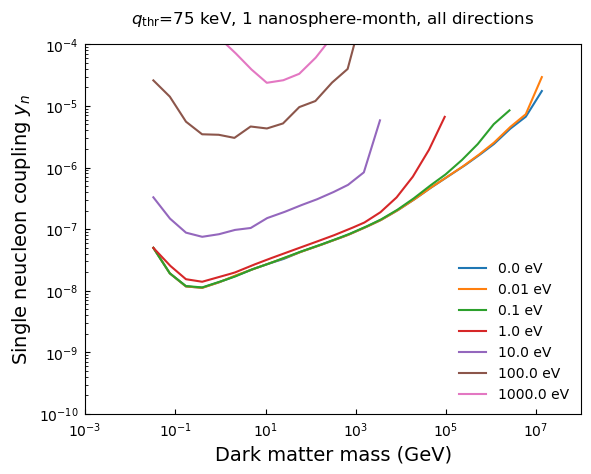

In [14]:
alpha_file = np.load('alpha_n_75kev_1spheremonth_alldirs.npz', allow_pickle='True')

mphi = alpha_file['mediator_mass']
mx_gev = alpha_file['mx_gev']
alpha_lim = alpha_file['alpha_n_lim']

yn_limit = alpha_lim * 4 * np.pi / 2

# Plot the yn limits
fig, ax = plt.subplots()

for i, lim in enumerate(yn_limit):
    ax.loglog(mx_gev[i], lim, label=f'{mphi[i]} eV')

ax.set_xlim(1e-3, 1e8)
ax.set_ylim(1e-10, 1e-4)
ax.tick_params(axis='both', which='both', direction="in", pad=5)

ax.set_title(r'$q_{\mathrm{thr}}$=75 keV, 1 nanosphere-month, all directions', fontsize=12, pad=15)
ax.legend(frameon=False, fontsize=10)
ax.set_xlabel('Dark matter mass (GeV)', fontsize=14)
ax.set_ylabel(r'Single neucleon coupling $y_n$', fontsize=14)

In [15]:
mphi

array([0.e+00, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [16]:
mmx = 1e3 / 1e9     # DM constituent mass in eV
nx = mx_gev / mmx   # Number of DM particles in a nugget
mx_ev = mx_gev * 1e9

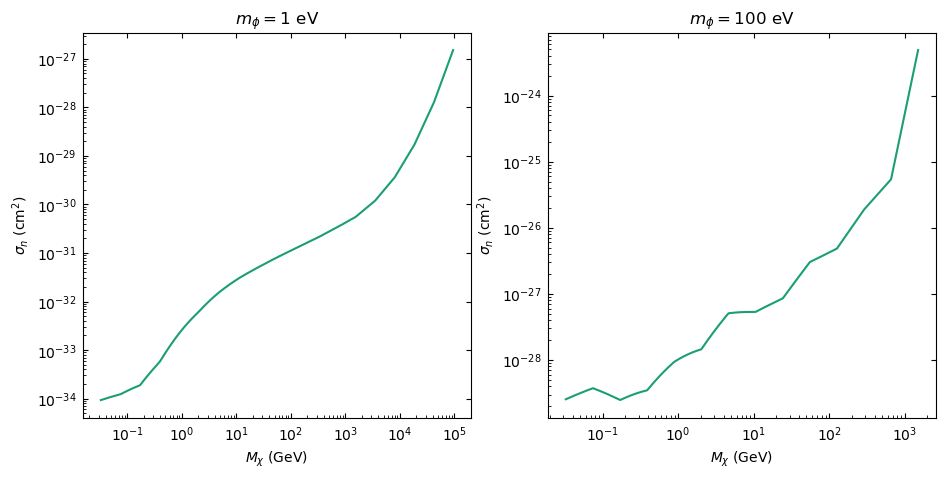

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))

name = "Dark2"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list
for a in ax:
    a.set_prop_cycle(color=colors)

i = 3
ax[0].loglog(mx_gev[i], get_sphere_sigma_n(mx_ev[i], mphi[i], yn_limit[i]))
ax[0].set_title('$m_\phi = 1 \ \mathrm{eV}$')
ax[0].set_xlabel('$M_\chi$ (GeV)')
ax[0].set_ylabel('$\sigma_n$ ($\mathrm{cm}^2$)')

i = 5
ax[1].loglog(mx_gev[i], get_sphere_sigma_n(mx_ev[i], mphi[i], yn_limit[i]))
ax[1].set_title('$m_\phi = 100 \ \mathrm{eV}$')
ax[1].set_xlabel('$M_\chi$ (GeV)')
ax[1].set_ylabel('$\sigma_n$ ($\mathrm{cm}^2$)')

for a in ax.flatten():
    a.tick_params(right=True, top=True, labelright=False, labeltop=False, labelrotation=0)
    a.tick_params(axis='both', which='both', direction="in", pad=5)